In [1]:
import nltk

In [2]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\Vinay\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open(r'C:\Users\Vinay\Documents\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection')]

In [4]:
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [5]:
print(len(messages))

5574


In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [10]:
for mess_num, message in enumerate(messages[:10]) :
    print(mess_num, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [11]:
import pandas as pd

In [19]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [20]:
messages = pd.read_csv(r'C:\Users\Vinay\Documents\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection',sep ='\t', names=['label', 'message'])

In [21]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [24]:
messages['length'] = messages['message'].apply(len)

In [25]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

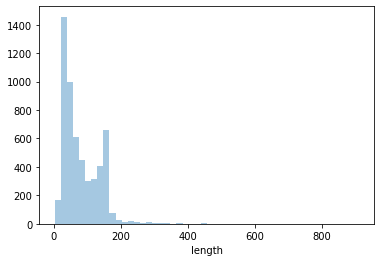

In [31]:
sns.distplot(messages['length'], kde= False )

<Figure size 720x864 with 0 Axes>

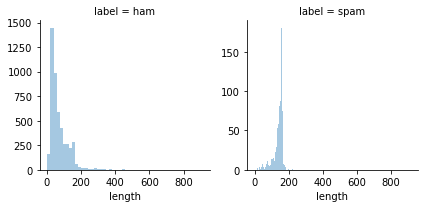

In [45]:
plt.figure(figsize= (10,12))
g = sns.FacetGrid(data= messages, col= 'label', sharey= False)
g.map(sns.distplot, 'length', kde = False)

In [47]:
sns.set_style("whitegrid")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029395729710>,
      dtype=object)

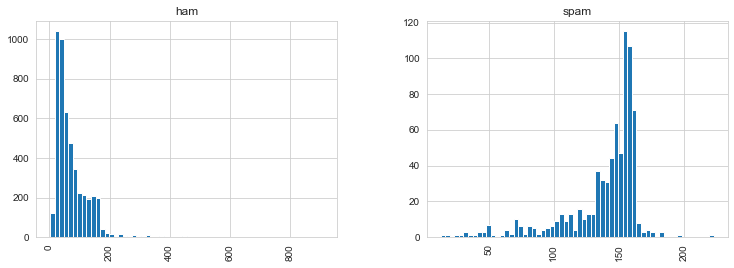

In [48]:
messages.hist(column= 'length', by = 'label', bins = 60, figsize=(12,4))

In [49]:
import string

In [50]:
mess = 'This string has some punctuations! So what, why you want to remove the . '

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
without_punc = [c for c in mess if c not in string.punctuation]

In [53]:
without_punc

['T',
 'h',
 'i',
 's',
 ' ',
 's',
 't',
 'r',
 'i',
 'n',
 'g',
 ' ',
 'h',
 'a',
 's',
 ' ',
 's',
 'o',
 'm',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's',
 ' ',
 'S',
 'o',
 ' ',
 'w',
 'h',
 'a',
 't',
 ' ',
 'w',
 'h',
 'y',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 ' ']

In [55]:
from nltk.corpus import stopwords

In [58]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
without_punc = ''.join(without_punc)

In [64]:
without_punc

'This string has some punctuations So what why you want to remove the  '

In [65]:
clean_mess = [word for word in without_punc.split() if without_punc not in stopwords.words('english')]

In [66]:
clean_mess

['This',
 'string',
 'has',
 'some',
 'punctuations',
 'So',
 'what',
 'why',
 'you',
 'want',
 'to',
 'remove',
 'the']

In [71]:
def text_process(mess) :
    no_punc = [x for x in mess if x not in string.punctuation]
    semi_process_word = ''.join(no_punc)
    output = [word for word in semi_process_word.split() if word.lower() not in stopwords.words('english')]
    return output
    

In [72]:
message = 'A cat has came to our house!'

In [73]:
text_process(message)

['cat', 'came', 'house']

In [78]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
bow_transformer = CountVectorizer(analyzer= text_process).fit(messages['message'])

In [81]:
print(len(bow_transformer.vocabulary_))

11425


In [82]:
mess4 = messages['message'][3]

In [83]:
mess4

'U dun say so early hor... U c already then say...'

In [84]:
bow4 = bow_transformer.transform([mess4])

In [85]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [86]:
print(bow4.shape)

(1, 11425)


In [87]:
bow_transformer.get_feature_names()[9554]

'say'

In [88]:
messages_bow = bow_transformer.transform(messages['message'])

In [89]:
messages_bow.shape

(5572, 11425)

In [90]:
messages_bow.nnz

50548

In [91]:
from sklearn.feature_extraction.text import TfidfTransformer

In [92]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [93]:
tfidf4 = tfidf_transformer.transform(bow4)

In [95]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [96]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [100]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [101]:
messages['label'][0]

'ham'

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [104]:
from sklearn.pipeline import Pipeline

In [106]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [108]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000293964A47B8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [109]:
pred = pipeline.predict(msg_test)

In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(label_test, pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.97      1672

